In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

titanic=pd.read_csv('./data/titanic_modified.csv')
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1


In [2]:
Y = titanic["Survived"]
X = titanic[["Pclass","Age","SibSp","Parch","Fare","female","male","C","Q","S"]]

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

titanic_reg = LogisticRegression()
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

titanic_reg.fit(X_train,y_train)

LogisticRegression()

In [4]:
train_prediction = titanic_reg.predict(X_train)
test_prediction = titanic_reg.predict(X_test)

test_prediction_probability = titanic_reg.predict_proba(X_test)[:,1]

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[373  63]
 [ 79 197]]


Confusion Matrix (Test Data)
------------------------------
[[94 19]
 [20 46]]


In [6]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FN = confusion_matrix_test[1][0]
FP = confusion_matrix_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 94
True positive amount  : 46
False positive amount : 19
False negative amount : 20


## Accuracy (TN+TP / TN+TP+FN+FP)

In [7]:
from sklearn.metrics import accuracy_score

print("accuracy_score() value        : ",  accuracy_score(y_test, test_prediction))

accuracy_score() value        :  0.7821229050279329


## Precision (TP / FP+TP)

In [8]:
from sklearn.metrics import precision_score

print("precision_score() value        : ",  precision_score(y_test, test_prediction))

precision_score() value        :  0.7076923076923077


## Recall (TP / TP+FN)

In [9]:
from sklearn.metrics import recall_score

print("recall_score() value        : ",  recall_score(y_test, test_prediction))

recall_score() value        :  0.696969696969697


## Specificity (TN / TN+FP)

In [10]:
print("Calculated specificity value   : ",  (TN)/(TN + FP))

Calculated specificity value   :  0.831858407079646


## F-1 Score

In [11]:
from sklearn.metrics import f1_score

precision = precision_score(y_test, test_prediction)

print("f1_score() value     : ",  f1_score(y_test, test_prediction))

f1_score() value     :  0.702290076335878


In [12]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test, test_prediction))

print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')

metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       113
           1       0.71      0.70      0.70        66

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

f1_score() value        : 0.70
recall_score() value    : 0.70
precision_score() value : 0.71


Precision  : [0.8245614  0.70769231]
Recall     : [0.83185841 0.6969697 ]
F1 Score   : [0.82819383 0.70229008]


## ROC Curve

In [13]:
test_prediction_proba = titanic_reg.predict_proba(X_test)[:,1]

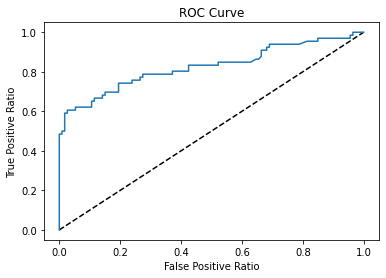

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

In [15]:
print('AUC value : ', roc_auc_score(y_test, test_prediction_proba))

AUC value :  0.8259587020648967


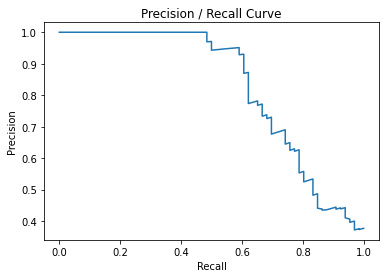

In [16]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()